In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
basepath = "/home/jonathan/tesis/11avo_avance/trayectoFeb_Jul.csv"
data = pd.read_csv(basepath, dtype={"fecha": str,
                                    "origen": str,
                                    "destino": str}, sep=',') 
data = data[['fecha','origen','destino','periodo','distancia','viajes']]

data.head()

,fecha,origen,destino,periodo,distancia,viajes
0,20200214,2807905,2807901,0,002-005,23.751
1,20200214,2807905,2807901,0,005-010,14.251
2,20200214,2807905,2807901,1,002-005,19.001
3,20200214,2807905,2807901,1,005-010,14.250
4,20200214,2807905,2807901,2,002-005,4.750


In [4]:
###################Periodo de Referencia######################
df_ref = data[data['fecha'].isin(['20200214','20200215','20200216','20200217','20200218','20200219','20200220',
                                  '20200221','20200222','20200223','20200224','20200225','20200226','20200227',
                                  '20200228','20200229','20200301','20200302','20200303','20200304','20200305',
                                  '20200306','20200307','20200308','20200309','20200310','20200311','20200312',
                                  '20200313','20200314','20200315'])]
print(df_ref.shape)

df_ref = df_ref.set_index('periodo')



###################Periodo de Confinamiento######################
df_Conf = data[data['fecha'].isin(['20200316','20200317','20200318','20200319','20200320','20200321','20200322',
                                   '20200323','20200324','20200325','20200326','20200327','20200328','20200329',
                                   '20200330','20200331','20200401','20200402','20200403','20200404','20200405',
                                   '20200406','20200407','20200408','20200409','20200410','20200411','20200412',
                                   '20200413','20200414','20200415','20200416','20200417','20200418','20200419',
                                   '20200420','20200421','20200422','20200423','20200424','20200425','20200426',
                                   '20200427','20200428','20200429','20200430','20200501','20200502'])]
print(df_Conf.shape)

df_Conf = df_Conf.set_index('periodo')


###################Periodo de Desescalada######################
df_Des = data[data['fecha'].isin(['20200503','20200504','20200505','20200506','20200507','20200508','20200509',
                                  '20200510','20200511','20200512','20200513','20200514','20200515','20200516',
                                  '20200517','20200518','20200519','20200520','20200521','20200522','20200523',
                                  '20200524','20200525','20200526','20200527','20200528','20200529','20200530',
                                  '20200531','20200601','20200602','20200603','20200604','20200605','20200606',
                                  '20200607','20200608','20200609','20200610','20200611','20200612','20200613',
                                  '20200614','20200615','20200616','20200617','20200618','20200619','20200620',
                                  '20200621'])]
print(df_Des.shape)

df_Des = df_Des.set_index('periodo')


###################Periodo de Nnormalidad######################
df_Nnor = data[data['fecha'].isin(['20200622','20200623','20200624','20200625','20200626','20200627','20200628',
                                  '20200629','20200630','20200701','20200702','20200703','20200704','20200705',
                                  '20200706','20200707','20200708','20200709','20200710','20200711','20200712',
                                  '20200713','20200714','20200715','20200716','20200717','20200718','20200719',
                                  '20200720','20200721','20200722','20200723','20200724','20200725','20200726',
                                  '20200727','20200728','20200729','20200730','20200731'])]
print(df_Nnor.shape)

df_Nnor = df_Nnor.set_index('periodo')

(14489, 6)
(6250, 6)
(10764, 6)
(11758, 6)


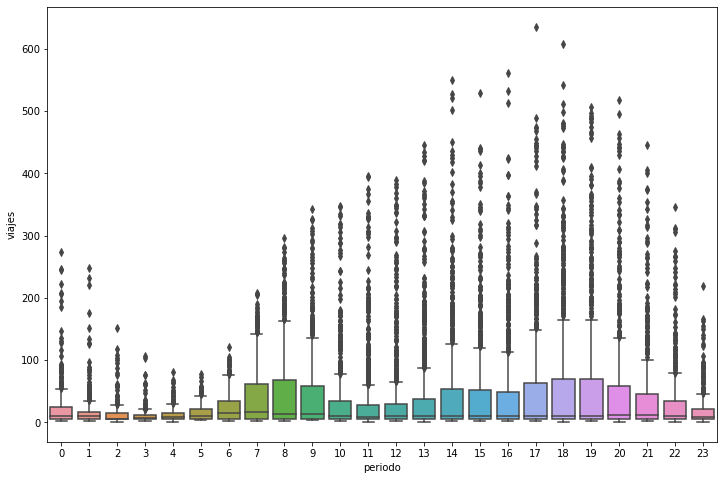

In [5]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df_ref.index,y='viajes',data=df_ref)
plt.show()

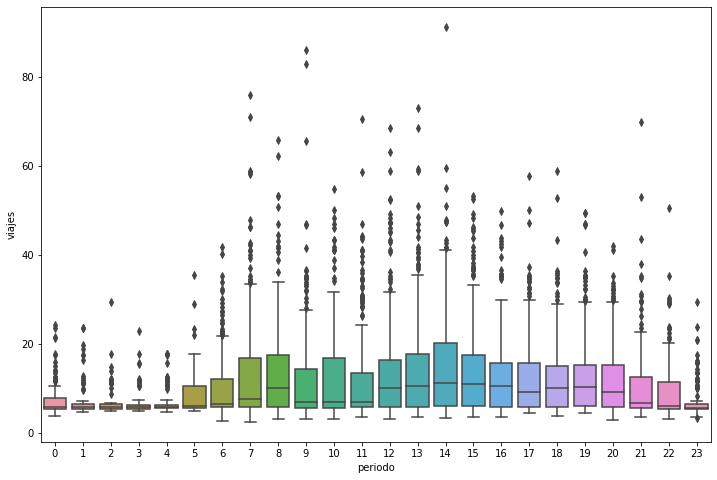

In [6]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df_Conf.index,y='viajes',data=df_Conf)
plt.show()

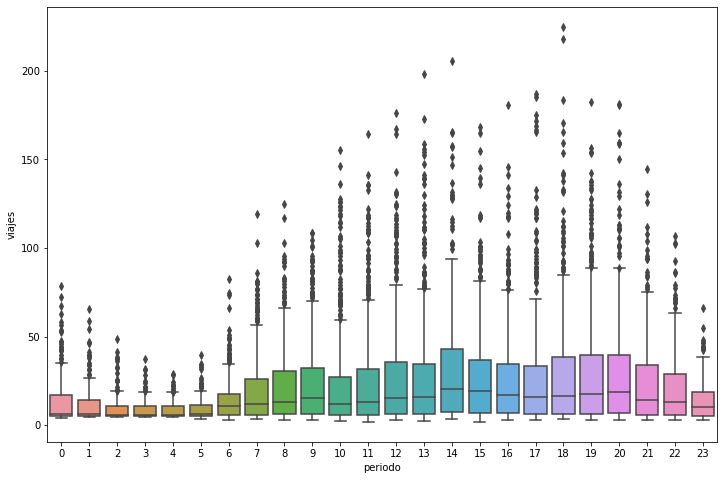

In [7]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df_Des.index,y='viajes',data=df_Des)
plt.show()

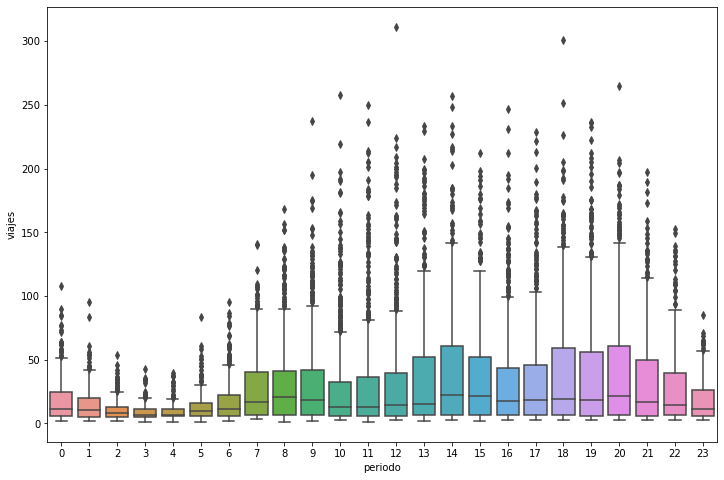

In [8]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df_Nnor.index,y='viajes',data=df_Nnor)
plt.show()